In [ ]:
# Step 1: Install & import necessary packages
!pip install opencv-python-headless

import cv2
import numpy as np
from google.colab import files
import os


In [ ]:
# Step 2: Upload MRI image
uploaded = files.upload()
filename = list(uploaded.keys())[0]
img = cv2.imread(filename)
img = cv2.resize(img, (256, 256))  # Resize for memory efficiency
original = img.copy()


Saving Brain.jpeg to Brain.jpeg


In [ ]:
# Step 3: Preprocess
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morphology
kernel = np.ones((5, 5), np.uint8)
morphed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)


array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0,   0, 255],
        [  0, 255,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0, 255,   0]],

       ...,

       [[  0,   0, 255],
        [  0, 255,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0, 255,   0]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0, 255,   0]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]], dtype=uint8)
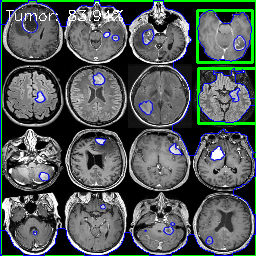

In [ ]:
# Step 4: Find contours and highlight tumor
contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
tumor_area = 0

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 100:
        tumor_area += area
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(original, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.drawContours(original, [cnt], -1, (0, 0, 255), 1)

tumor_percent = (tumor_area / (256*256)) * 100
cv2.putText(original, f"Tumor: {tumor_percent:.2f}%", (5, 20),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)


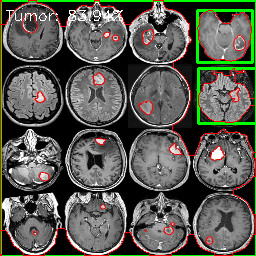

In [ ]:
# Step 5: Show result using OpenCV-safe method in Colab
from google.colab.patches import cv2_imshow
cv2_imshow(original)
